In [2]:
import os
import json
from zipfile import ZipFile
from tqdm.notebook import tqdm
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:40<00:00, 218MB/s]
100% 2.04G/2.04G [00:40<00:00, 54.5MB/s]


In [5]:
with ZipFile('plantvillage-dataset.zip', 'r') as zipObj:
   zipObj.extractall()

In [6]:
print(os.listdir('plantvillage dataset/'))

print(len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/color')[:5])

print(len(os.listdir('plantvillage dataset/grayscale')))
print(os.listdir('plantvillage dataset/grayscale')[:5])

print(len(os.listdir('plantvillage dataset/segmented')))
print(os.listdir('plantvillage dataset/segmented')[:5])


['color', 'grayscale', 'segmented']
38
['Tomato___Septoria_leaf_spot', 'Pepper,_bell___Bacterial_spot', 'Peach___Bacterial_spot', 'Grape___healthy', 'Potato___Late_blight']
38
['Tomato___Septoria_leaf_spot', 'Pepper,_bell___Bacterial_spot', 'Peach___Bacterial_spot', 'Grape___healthy', 'Potato___Late_blight']
38
['Tomato___Septoria_leaf_spot', 'Pepper,_bell___Bacterial_spot', 'Peach___Bacterial_spot', 'Grape___healthy', 'Potato___Late_blight']


## Seeding

In [7]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

## Data Preprocessing

(256, 256, 3)


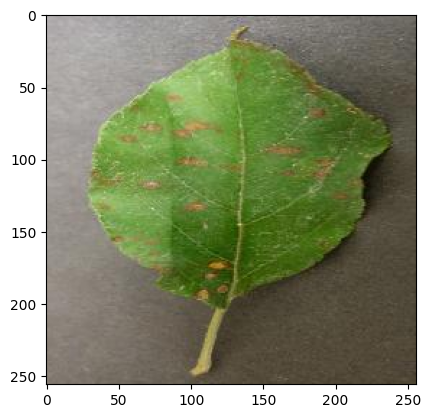

In [8]:
base_dir = 'plantvillage dataset/color'
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'
img = mpimg.imread(image_path)
print(img.shape)

plt.imshow(img)
plt.show()

In [9]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [10]:
img_size=224
batch_size=32

## Train Test Split

In [11]:
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [13]:
train_generator=data_gen.flow_from_directory(base_dir,
                                             target_size=(img_size,img_size),
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             subset='training'
                                             )

validation_generator=data_gen.flow_from_directory(base_dir,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='validation'
                                                  )

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


## CNN Model

In [32]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(img_size, img_size, 3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax')) # for multiclass problem

In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,282,470 (85.00 MB)

 Trainable params: 22,282,470 (85.00 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(
    train_generator,
    epochs=7,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 101s 72ms/step - accuracy: 0.5602 - loss: 1.5975 - val_accuracy: 0.8496 - val_loss: 0.4779
Epoch 2/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 96s 71ms/step - accuracy: 0.8877 - loss: 0.3529 - val_accuracy: 0.8992 - val_loss: 0.3135
Epoch 3/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 96s 71ms/step - accuracy: 0.9389 - loss: 0.1886 - val_accuracy: 0.8992 - val_loss: 0.3308
Epoch 4/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 97s 72ms/step - accuracy: 0.9620 - loss: 0.1127 - val_accuracy: 0.9053 - val_loss: 0.3550
Epoch 5/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 141s 71ms/step - accuracy: 0.9742 - loss: 0.0806 - val_accuracy: 0.8992 - val_loss: 0.4113
Epoch 6/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 71ms/step - accuracy: 0.9776 - loss: 0.0706 - val_accuracy: 0.9083 - val_loss: 0.3999
Epoch 7/7
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 71ms/step - accuracy: 0.9761 - loss: 0.0767 - val_accuracy: 0.9065 - val_loss: 0.4014


## Model Evaluation

In [36]:
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.9047 - loss: 0.4064
Validation Accuracy: 90.65%


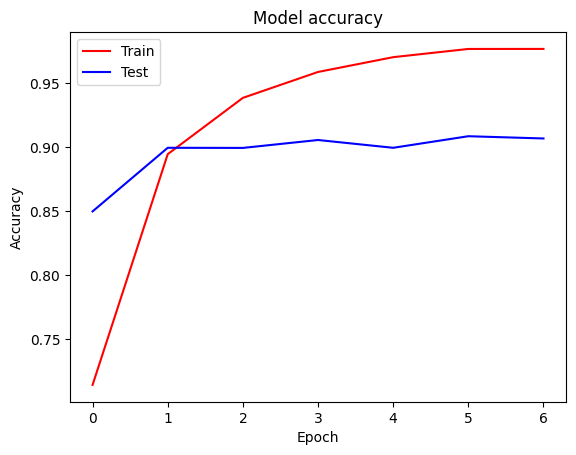

In [37]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

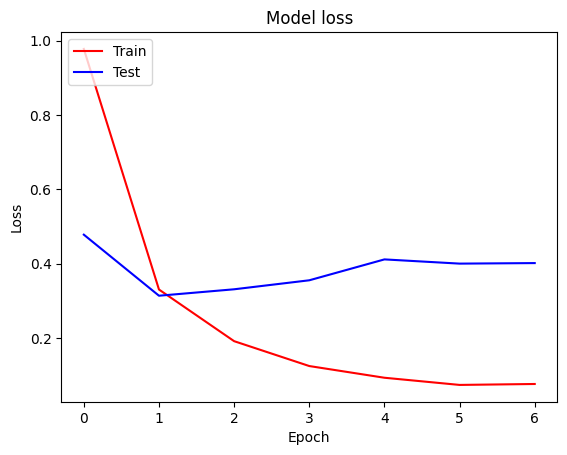

In [38]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [44]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)[0]
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_indices[predicted_class_index]
    confidence = predictions[predicted_class_index] * 100
    return predicted_class_name, confidence

In [45]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step


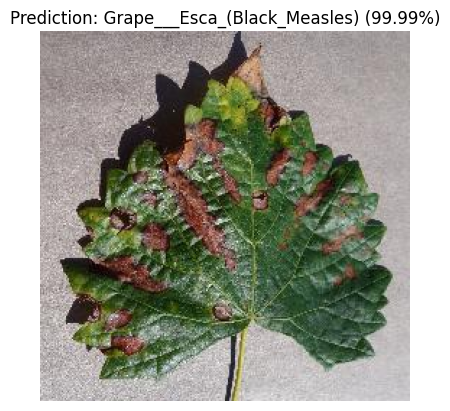

In [48]:
import matplotlib.pyplot as plt
img = Image.open('leaf.JPG')
predicted_class_name, confidence = predict_image_class(model, 'leaf.JPG', class_indices)
plt.imshow(img)
plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
plt.axis("off")
plt.show()

In [49]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [51]:
model.save('plant_model.keras')